In [ ]:
print("ASAS")

ASAS


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import os
import cv2
import numpy as np
import  skimage 
from skimage import filters
cnt = 0
def fun(path, cnt):
  Y =[]
  X =[]
  for folder in os.listdir(path):
    print(folder)

    for i in os.listdir(path + "/" + folder):
      save = (path + "/" +folder + "/" + i)
      img_path = (cv2.imread(save))
      img = skimage.transform.resize(img_path, (200, 200, 3))
      X.append(img)
      cnt += 1
      print(cnt)
      if folder == "PNEUMONIA":
        Y.append(1)
      elif folder == "NORMAL":
        Y.append(0)
  return X , Y

x_test , y_test = fun("/content/drive/MyDrive/archive/chest_xray/test", cnt)
#x_train , y_train = fun("/content/drive/MyDrive/archive/chest_xray/train", cnt)
#x_val , y_val = fun("/content/drive/MyDrive/archive/chest_xray/val" , cnt)


NORMAL
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
PNEUMONIA
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273

In [ ]:
'''
x_test = np.array(x_test)
y_test = np.array(y_test)
with open('x_test.npy', 'wb') as f:
  np.save(f, x_test)

with open('y_test.npy', 'wb') as f:
  np.save(f, y_test)
'''
import numpy as np
x_test = np.load("/content/x_test.npy")
y_test = np.load("/content/y_test.npy")


'''
with open('x_train.npy', 'wb') as f:
  np.save(f, x_train)

with open('y_train.npy', 'wb') as f:
  np.save(f, y_train)
'''

x_train = np.load("/content/x_train.npy")
y_train = np.load("/content/y_train.npy")


x_val = np.load("/content/x_val.npy")
y_val = np.load("/content/y_val.npy")


'''
x_val = np.array(x_val)
y_val = np.array(y_val)

with open('x_val.npy', 'wb') as f:
  np.save(f, x_val)
  
with open('y_val.npy', 'wb') as f:
  np.save(f, y_val)
'''


"\nx_val = np.array(x_val)\ny_val = np.array(y_val)\n\nwith open('x_val.npy', 'wb') as f:\n  np.save(f, x_val)\n  \nwith open('y_val.npy', 'wb') as f:\n  np.save(f, y_val)\n"

In [ ]:
print("x_test" , x_test.shape)
print("y_test" , y_test.shape)

#print("x_train" , x_train.shape)
#print("y_train" , y_train.shape)



print("x_val" , x_val.shape)
print("y_val" , y_val.shape)


x_test (624, 200, 200, 3)
y_test (624,)
x_val (16, 200, 200, 3)
y_val (16,)


In [ ]:
import tensorflow as tf
import keras
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x = x_train,y = y_train,epochs = 30,verbose = 1, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
163/163 [==============================] - 48s 83ms/step - loss: 0.4402 - acc: 0.8058 - val_loss: 0.8022 - val_acc: 0.6250
Epoch 2/30
163/163 [==============================] - 13s 80ms/step - loss: 0.1967 - acc: 0.9225 - val_loss: 0.5086 - val_acc: 0.7500
Epoch 3/30
163/163 [==============================] - 13s 80ms/step - loss: 0.1454 - acc: 0.9438 - val_loss: 0.5638 - val_acc: 0.6875
Epoch 4/30
163/163 [==============================] - 13s 80ms/step - loss: 0.1226 - acc: 0.9532 - val_loss: 0.2671 - val_acc: 0.9375
Epoch 5/30
163/163 [==============================] - 13s 80ms/step - loss: 0.1136 - acc: 0.9580 - val_loss: 0.3720 - val_acc: 0.8125
Epoch 6/30
163/163 [==============================] - 13s 79ms/step - loss: 0.0992 - acc: 0.9659 - val_loss: 0.2771 - val_acc: 0.8125
Epoch 7/30
163/163 [==============================] - 13s 79ms/step - loss: 0.0881 - acc: 0.9688 - val_loss: 0.3301 - val_acc: 0.9375
Epoch 8/30
163/163 [==============================] - 13s 79ms

In [ ]:
#model.predict(x_test)

NameError: ignored

In [ ]:
model.evaluate(x_test, y_test)

20/20 [==============================] - 1s 33ms/step - loss: 1.4915 - acc: 0.7837


[1.4915168285369873, 0.7836538553237915]

In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:

from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:

from keras.models import load_model

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])
model.load_weights('/content/model.h5')
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#np.mean(model.predict(x_test) == y_test) * 100
model.predict(x_test).shape
#x_test.shape
ans = []
for i in model.predict(x_test):
  if i < 0.9432:
    ans.append(0)
  else:
    ans.append(1)

In [ ]:
ans = np.array(ans)
np.mean((ans) == y_test) * 100

83.01282051282051

In [ ]:
model.predict(x_test)

array([[9.83858168e-01],
       [2.42537066e-01],
       [1.33915648e-01],
       [2.31309518e-01],
       [9.23066199e-01],
       [9.99777257e-01],
       [4.69960511e-01],
       [2.45871786e-02],
       [7.86083750e-03],
       [2.94262648e-01],
       [8.35584641e-01],
       [1.19298231e-02],
       [9.98783052e-01],
       [4.40567136e-02],
       [8.43769789e-01],
       [7.12253749e-02],
       [8.14968348e-01],
       [6.54194213e-04],
       [3.79396006e-02],
       [9.14290607e-01],
       [9.98355329e-01],
       [6.59145653e-01],
       [9.99999881e-01],
       [8.04165393e-05],
       [7.39249140e-02],
       [1.15901776e-01],
       [9.32913721e-01],
       [9.30571184e-03],
       [3.08495872e-02],
       [9.99999762e-01],
       [3.04642110e-03],
       [5.61153376e-03],
       [9.81924772e-01],
       [1.56844094e-01],
       [9.99999881e-01],
       [1.18937844e-03],
       [1.37246950e-02],
       [9.99205649e-01],
       [9.99995828e-01],
       [9.99999762e-01],


In [ ]:
import numpy as np
x_test = np.array(x_test)
y_test = np.array(y_test)


In [ ]:
from keras.models import load_model
model = load_model("/content/pneumonia_model.h5")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 64)       

In [ ]:
a = []
for i in model.predict(x_test):
  if i >= 0.6:
    a.append(1)
  else:
    a.append(0)

In [ ]:
a = np.array(a)
#np.mean(np.array(a) , y_test)*100

In [ ]:
a.shape

(624,)

In [ ]:
y_test.shape

(624,)

In [ ]:
np.mean(np.array(a) == y_test)*100

78.52564102564102

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, a))

              precision    recall  f1-score   support

           0       0.96      0.44      0.61       234
           1       0.75      0.99      0.85       390

    accuracy                           0.79       624
   macro avg       0.86      0.72      0.73       624
weighted avg       0.83      0.79      0.76       624



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
cm = confusion_matrix(y_test, a)


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

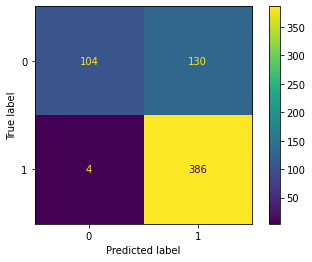

In [ ]:
disp.plot()
plt.show()

In [ ]:
S